In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
mat_mul2 = pd.read_csv('mat_mul2.csv')
my_mat_mul = pd.read_csv('my_mat_mul.csv')

In [11]:
mat_mul2['count'] = mat_mul2['count'].replace(',', '', regex=True).astype('float64')
my_mat_mul['count'] = my_mat_mul['count'].replace(',', '', regex=True).astype('float64') 
#remove % from the data and convert to float
mat_mul2['perf'] = mat_mul2['perf'].replace('%', '', regex=True).astype('float64')
my_mat_mul['perf'] = my_mat_mul['perf'].replace('%', '', regex=True).astype('float64')

In [4]:
my_mat_mul.head(20)

,size,metric,count,perf,unit
0,1000,task-clock,154.26,0.758,CPUs utilized
1,1000,context-switches,3,18.467,/sec
2,1000,cpu-migrations,0,0,/sec
3,1000,page-faults,"7,878",48.496,K/sec
4,1000,cycles,"517,486,216",3.186,GHz
5,1000,instructions,"463,553,891",0.87,insn per cycle
6,1000,branches,"27,873,228",171.583,M/sec
7,1000,branch-misses,"147,944",0.60%,of all branches
8,1000,L1-dcache-loads,"141,971,017",873.949,M/sec
9,1000,L1-dcache-load-misses,"131,182,944",93.37%,of all L1-dcache accesses


In [12]:
ins = mat_mul2[mat_mul2['metric'] == 'instructions']
my_ins = my_mat_mul[my_mat_mul['metric'] == 'instructions']

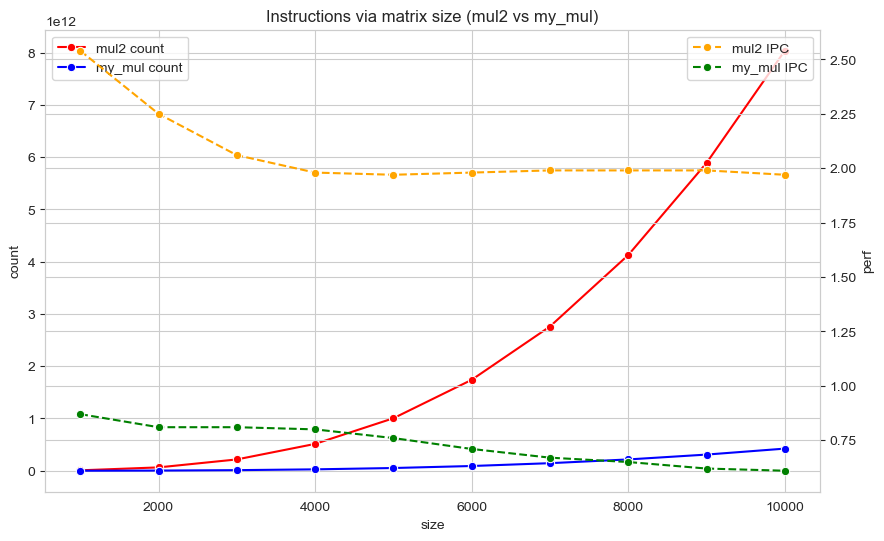

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
#set left y axis as count, right y axis as performance
#mark the point 
sns.lineplot(x="size", y="count", data=ins, label='mul2 count', color='red', marker='o')
sns.lineplot(x="size", y="count", data=my_ins, label='my_mul count', color='blue', marker='o')
ax2 = plt.twinx()
sns.lineplot(x="size", y="perf", data=ins, label='mul2 IPC', color='orange', ax=ax2, linestyle='--', marker='o')
sns.lineplot(x="size", y="perf", data=my_ins, label='my_mul IPC', color='green', ax=ax2, linestyle='--', marker='o')
plt.title('Instructions via matrix size (mul2 vs my_mul)')
plt.savefig('ins.png')

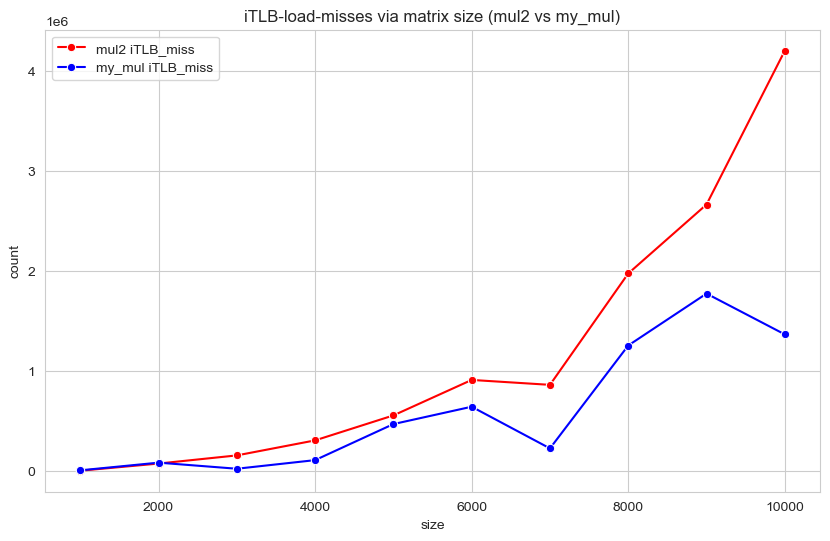

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
iTLB_miss = mat_mul2[mat_mul2['metric'] == 'iTLB-load-misses']
my_iTLB_miss = my_mat_mul[my_mat_mul['metric'] == 'iTLB-load-misses']
sns.lineplot(x="size", y="count", data=iTLB_miss, label='mul2 iTLB_miss', color='red', marker='o')
sns.lineplot(x="size", y="count", data=my_iTLB_miss, label='my_mul iTLB_miss', color='blue', marker='o')
plt.title('iTLB-load-misses via matrix size (mul2 vs my_mul)')
plt.savefig('iTLB_miss.png')